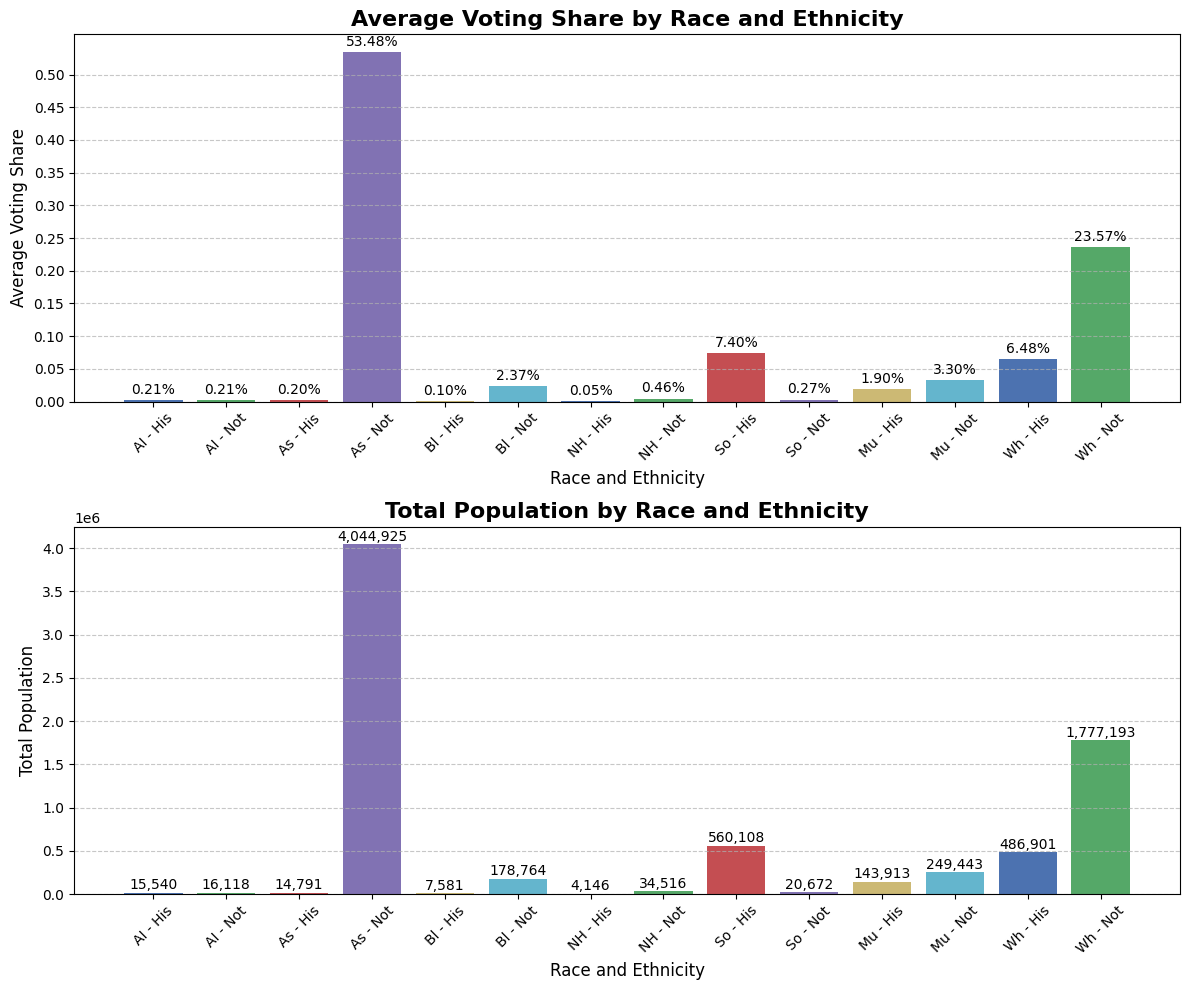

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/content/Race and Ethnicity Cleaned.csv'
data = pd.read_csv(file_path)

# Group by Race and Ethnicity to analyze population share distributions across groups
race_ethnicity_distribution = data.groupby(['Race', 'Ethnicity']).agg({
    'Population': 'sum',
    'share': 'mean'
}).reset_index()

# Define a color palette for improved visualization
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3', '#ccb974', '#64b5cd']

# Create a dictionary to map long names to shorter, more concise names for race
short_names = {
    'White Alone': 'White',
    'Black or African American Alone': 'Black',
    'American Indian & Alaska Native Alone': 'AI/AN',
    'Asian Alone': 'Asian',
    'Native Hawaiian & Other Pacific Islander Alone': 'NH/PI',
    'Two or More Races': 'Multiracial'
}

# Apply the short names to the Race column
race_ethnicity_distribution['Race'] = race_ethnicity_distribution['Race'].replace(short_names)

# Combine the Race and Ethnicity with even shorter abbreviations for better fit on the x-axis
race_ethnicity_distribution['Short Label'] = race_ethnicity_distribution['Race'].str[:2] + " - " + race_ethnicity_distribution['Ethnicity'].str[:3]

# Create the figure and axes for visualizations with shortened labels
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plotting average voting share by race and ethnicity with shortened labels
ax1.bar(race_ethnicity_distribution['Short Label'], race_ethnicity_distribution['share'], color=colors)
ax1.set_title("Average Voting Share by Race and Ethnicity", fontsize=16, weight='bold')
ax1.set_xlabel("Race and Ethnicity", fontsize=12)
ax1.set_ylabel("Average Voting Share", fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Setting y-axis from 0.0 to 0.5 with increments of 0.05
ax1.set_yticks(np.arange(0.0, 0.51, 0.05))

# Annotate each bar with the share percentage
for index, value in enumerate(race_ethnicity_distribution['share']):
    ax1.text(index, value + 0.005, f"{value:.2%}", ha='center', va='bottom', fontsize=10, color='black')

# Plotting total population by race and ethnicity with shortened labels
ax2.bar(race_ethnicity_distribution['Short Label'], race_ethnicity_distribution['Population'], color=colors)
ax2.set_title("Total Population by Race and Ethnicity", fontsize=16, weight='bold')
ax2.set_xlabel("Race and Ethnicity", fontsize=12)
ax2.set_ylabel("Total Population", fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with the population count
for index, value in enumerate(race_ethnicity_distribution['Population']):
    ax2.text(index, value + 5000, f"{value:,}", ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


**Voting Tendencies by Race and ethnicity**--

A) In 2022, Congressional District 17, CA had 2.59 times more Asian (Non-Hispanic) residents (419,000 people) than any other racial or ethnic group. White (Non-Hispanic) residents numbered 162,000, followed by 56,300 Hispanic residents from other racial backgrounds, making them the second and third largest groups.

**The first graph**(Voting Share by Race and Ethnicity): shows that Asian Non-Hispanic and White Non-Hispanic groups hold the largest voting shares, suggesting they are the most influential demographics in terms of potential voter impact. This indicates that these groups are likely to have a strong sway in election results, especially if turnout among these populations is high

 **The second graph**(Total Population by Race and Ethnicity): highlights the actual population size of each group. Asian Non-Hispanic individuals form a significant portion of the population, followed by White Non-Hispanic individuals, reflecting their strong presence within the district.

1. Key Voting Blocks: In Congressional District 17, Asian and White Non-Hispanic populations have the highest voting shares and largest populations, indicating they are crucial for influencing election outcomes. Candidates should focus on issues like economic policies, healthcare, and education, aligning with the district’s generally progressive preferences among Asian and diverse preferences among White voters.

2. Hispanic Population: Although smaller, the Hispanic demographic remains significant, especially on issues like immigration reform and healthcare. The Margin of Error (MOE) for this group indicates data reliability; targeted engagement on these issues could enhance turnout, leveraging the unique priorities of Hispanic voters.

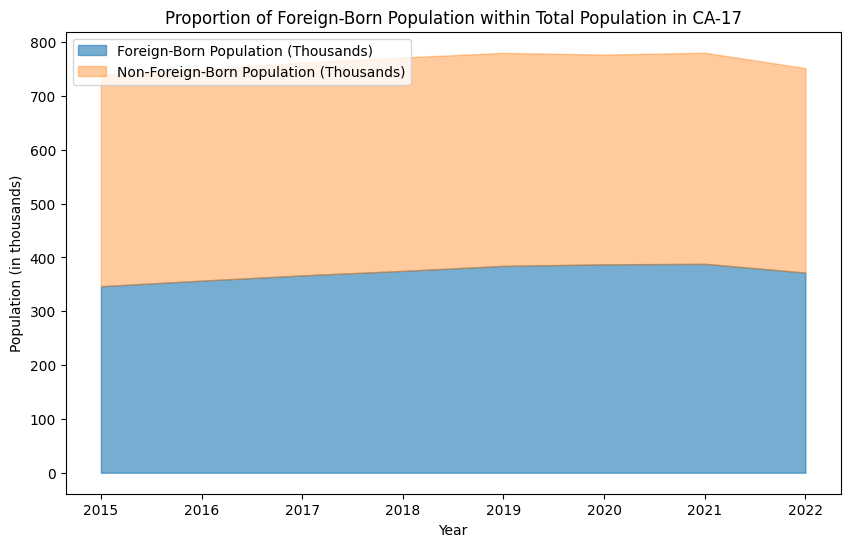

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the foreign-born population data from the CSV file
foreign_born_data = pd.read_csv('/content/Foreign-Born Population.csv')

# Filter the data for California's 17th Congressional District (CA-17)
ca_17_data = foreign_born_data[foreign_born_data['Congressional District'] == 'Congressional District 17, CA']

# Drop rows with missing data in 'Foreign-Born Citizens' column to focus on years with complete data
ca_17_data_clean = ca_17_data.dropna(subset=['Foreign-Born Citizens'])

# Prepare data for plotting
years = ca_17_data_clean['Year'].astype(int).values
foreign_born_population = ca_17_data_clean['Foreign-Born Citizens'].values
total_population = ca_17_data_clean['Population'].values

# Calculate the Non-Foreign-Born Population
non_foreign_born_population = total_population - foreign_born_population

# Improved stacked area plot to show proportion of Foreign-Born Population within Total Population
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Foreign-Born Population as an area
ax.fill_between(years, 0, foreign_born_population / 1000, label="Foreign-Born Population (Thousands)", color="tab:blue", alpha=0.6)

# Plot Non-Foreign-Born Population as the remaining part of the total population
ax.fill_between(years, foreign_born_population / 1000, total_population / 1000, label="Non-Foreign-Born Population (Thousands)", color="tab:orange", alpha=0.4)

# Labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Population (in thousands)")
ax.set_title("Proportion of Foreign-Born Population within Total Population in CA-17")
ax.legend(loc="upper left")

# Show the plot
plt.show()


**Demographic Trends and Electoral Influence of the Foreign-Born Population in CA-17**

In California’s 17th Congressional District (CA-17), the foreign-born population, making up nearly half of the district, is a major demographic with a consistent impact on the community and elections.

a) Significant and Stable Influence: The foreign-born population has remained a substantial part of CA-17’s demographics, peaking in 2021 and slightly decreasing in 2022. This group continues to play a key role in shaping the district's political landscape.

b) Gradual Shift: While the foreign-born population has seen a minor decline, the non-foreign-born population has grown slowly. This gradual shift might influence community needs and political preferences over time.

c) Electoral Power: With stable overall population numbers, CA-17’s foreign-born residents hold considerable voting power. Their turnout and issues of concern could strongly impact election results, especially if candidates address their priorities.

In short, the foreign-born population in CA-17 is a steady, influential demographic, making it crucial to understand their preferences and engagement patterns for election predictions.

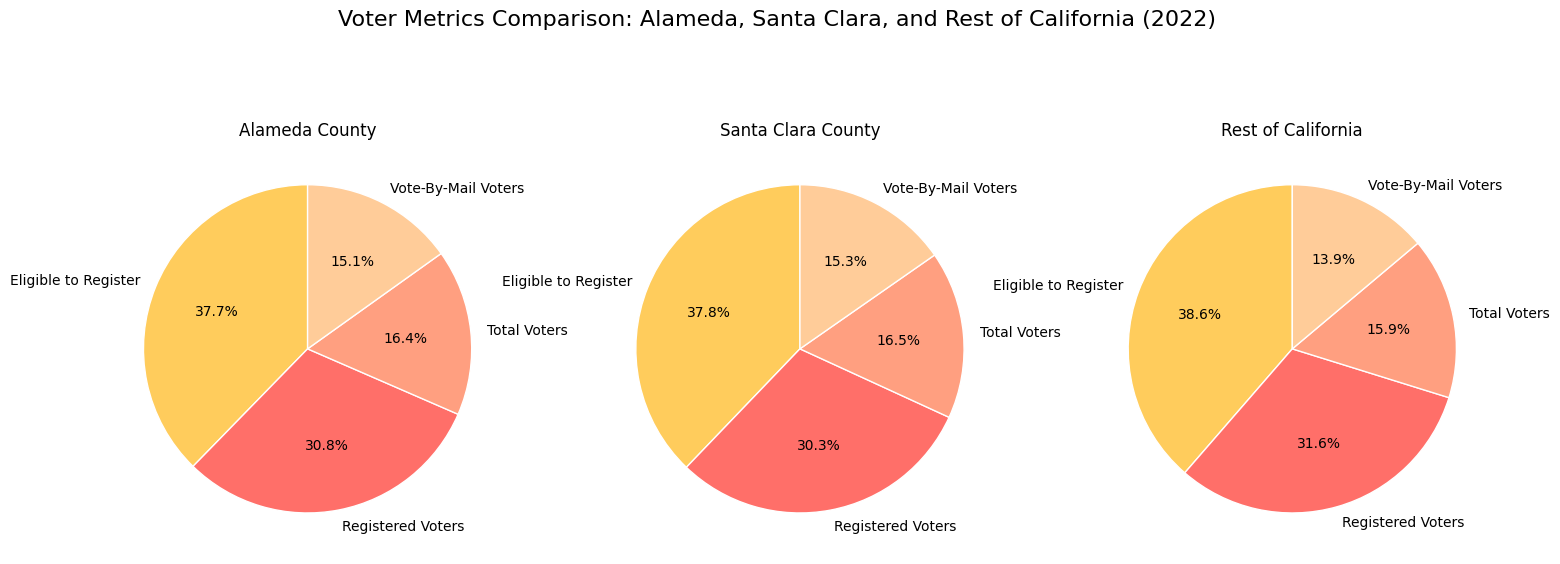

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Data for each region
alameda_data = {
    "Eligible to Register": 1140774,
    "Registered Voters": 931130,
    "Total Voters": 496125,
    "Vote-By-Mail Voters": 457817
}

santa_clara_data = {
    "Eligible to Register": 1259821,
    "Registered Voters": 1009422,
    "Total Voters": 550602,
    "Vote-By-Mail Voters": 509908
}

# Data for the rest of California (total values excluding Alameda and Santa Clara)
rest_of_california_data = {
    "Eligible to Register": 26876800 - (1140774 + 1259821),
    "Registered Voters": 21940274 - (931130 + 1009422),
    "Total Voters": 11146620 - (496125 + 550602),
    "Vote-By-Mail Voters": 9755198 - (457817 + 509908)
}

# Define warm gradient color palette
warm_colors = ["#ffcc5c", "#ff6f69", "#ff9f80", "#ffcc99"]

# Setting up three pie charts in a single figure with warm gradient colors
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 7))
fig.suptitle("Voter Metrics Comparison: Alameda, Santa Clara, and Rest of California (2022)", fontsize=16)

# Plot for Alameda County
ax1.pie(alameda_data.values(), labels=alameda_data.keys(), autopct='%1.1f%%', startangle=90,
        colors=warm_colors, wedgeprops=dict(edgecolor="white", linewidth=1))
ax1.set_title("Alameda County")

# Plot for Santa Clara County
ax2.pie(santa_clara_data.values(), labels=santa_clara_data.keys(), autopct='%1.1f%%', startangle=90,
        colors=warm_colors, wedgeprops=dict(edgecolor="white", linewidth=1))
ax2.set_title("Santa Clara County")

# Plot for Rest of California
ax3.pie(rest_of_california_data.values(), labels=rest_of_california_data.keys(), autopct='%1.1f%%', startangle=90,
        colors=warm_colors, wedgeprops=dict(edgecolor="white", linewidth=1))
ax3.set_title("Rest of California")

plt.show()


This section provides a comparative analysis of voter engagement across Alameda County, Santa Clara County, and the rest of California for the 2022 general election. Key metrics include the number of eligible voters, registered voters, total voters, and vote-by-mail participation. This data highlights the significance of these counties within California’s electoral landscape.




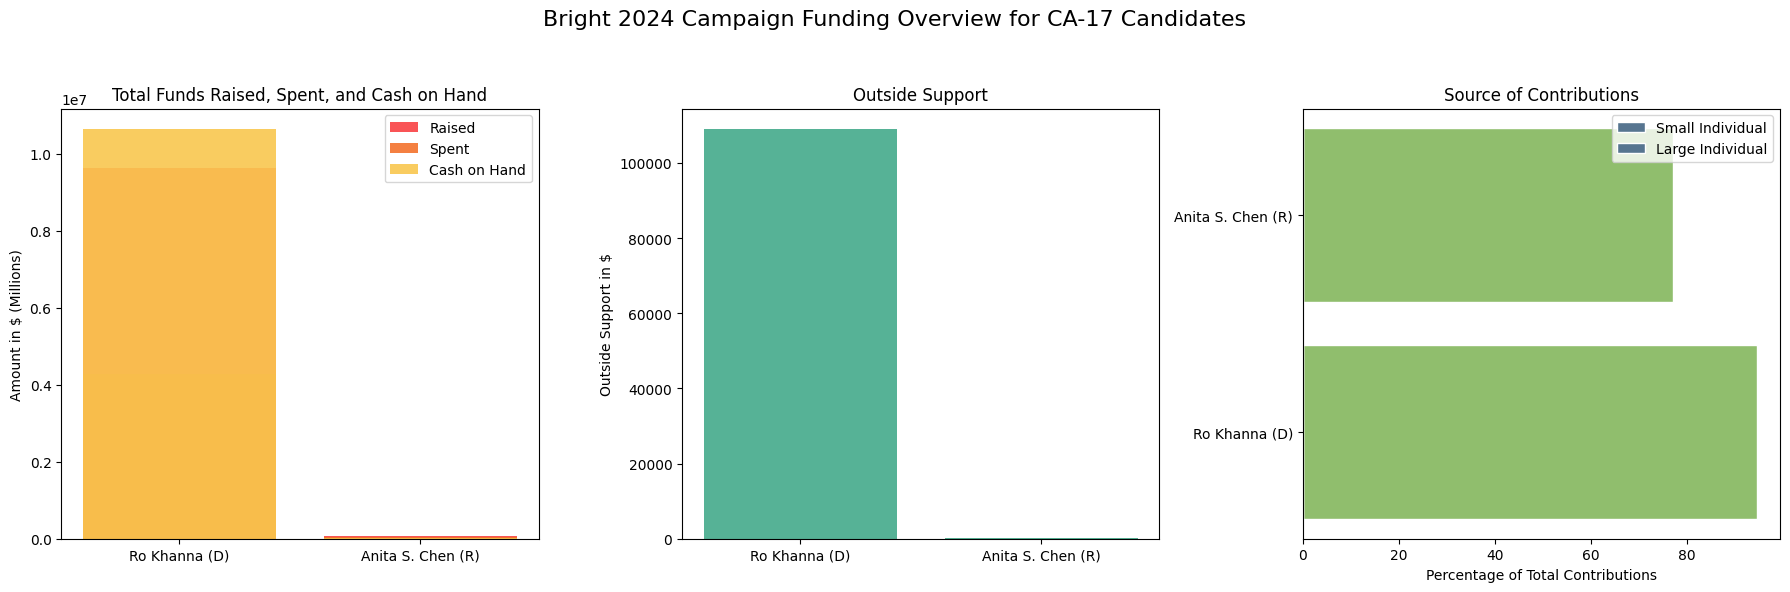

In [ ]:
import matplotlib.pyplot as plt

candidates = ["Ro Khanna (D)", "Anita S. Chen (R)"]
raised = [9637387, 67252]
spent = [4283325, 57100]
cash_on_hand = [10642583, 10153]
outside_support = [109022, 157]

khanna_sources = [5.45, 94.68, 0.0, 0.0]
chen_sources = [24.74, 77.12, 0.0, 0.0]
sources_labels = ["Small Individual", "Large Individual", "PAC", "Self-financing"]

raised_color = "#f94144"
spent_color = "#f3722c"
cash_on_hand_color = "#f9c74f"
outside_support_color = "#43aa8b"
small_individual_color = "#577590"
large_individual_color = "#90be6d"
pac_color = "#f9844a"
self_financing_color = "#ff006e"

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Bright 2024 Campaign Funding Overview for CA-17 Candidates", fontsize=16)

x = range(len(candidates))
axs[0].bar(x, raised, label="Raised", color=raised_color, alpha=0.9)
axs[0].bar(x, spent, label="Spent", color=spent_color, alpha=0.9)
axs[0].bar(x, cash_on_hand, label="Cash on Hand", color=cash_on_hand_color, alpha=0.9)
axs[0].set_xticks(x)
axs[0].set_xticklabels(candidates)
axs[0].set_ylabel("Amount in $ (Millions)")
axs[0].legend()
axs[0].set_title("Total Funds Raised, Spent, and Cash on Hand")

axs[1].bar(candidates, outside_support, color=outside_support_color, alpha=0.9)
axs[1].set_ylabel("Outside Support in $")
axs[1].set_title("Outside Support")

axs[2].barh("Ro Khanna (D)", khanna_sources, color=[small_individual_color, large_individual_color, pac_color, self_financing_color], edgecolor="white")
axs[2].barh("Anita S. Chen (R)", chen_sources, color=[small_individual_color, large_individual_color, pac_color, self_financing_color], edgecolor="white")
axs[2].set_xlabel("Percentage of Total Contributions")
axs[2].set_title("Source of Contributions")
axs[2].legend(sources_labels, loc="upper right")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


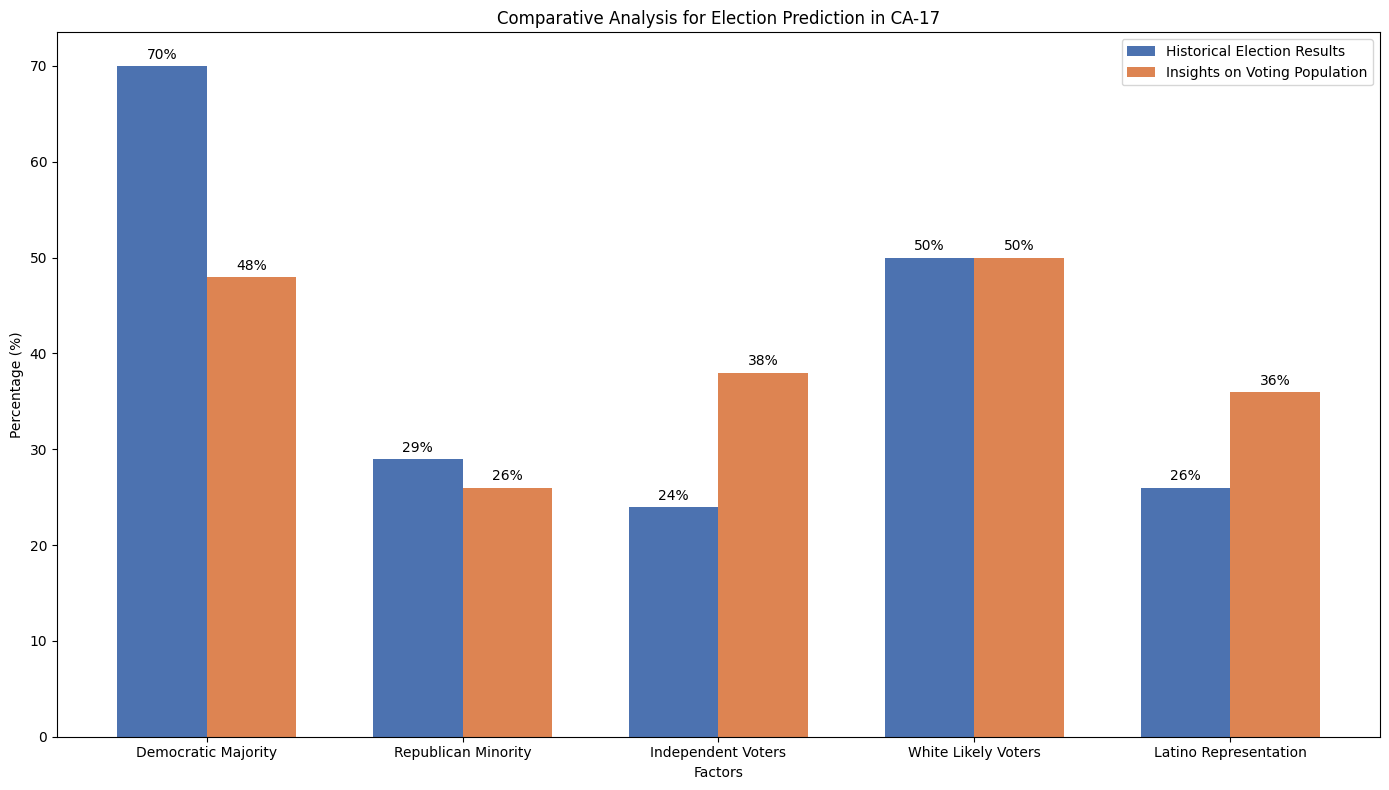

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization based on historical election results and voter demographics
categories = ["Democratic Majority", "Republican Minority", "Independent Voters", "White Likely Voters", "Latino Representation"]
values_historical = [70, 29, 24, 50, 26]  # Sample values based on historical data and demographics
values_insights = [48, 26, 38, 50, 36]  # Sample values reflecting Insights on California's Voting Population

# Updated color scheme for better distinction
historical_color = "#4c72b0"  # Deep blue
insights_color = "#dd8452"  # Orange

# Setting up a dual bar chart to represent the comparative data
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, values_historical, width, label='Historical Election Results', color=historical_color)
bar2 = ax.bar(x + width/2, values_insights, width, label='Insights on Voting Population', color=insights_color)

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Factors')
ax.set_ylabel('Percentage (%)')
ax.set_title('Comparative Analysis for Election Prediction in CA-17')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Adding percentage labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()
